In [45]:
#Importing Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from config import value_key
import seaborn as sns 
from citipy import citipy 
import requests as req
import time
import json
import random
%matplotlib inline


In [46]:
#generating randomly a list of latitudes and longitudes 

latitude = []
longitude = []

for list_lat in np.random.randint(-90,90,800):
    latitude.append(list_lat)

for list_lon in np.random.randint(-180,180,900):
    longitude.append(list_lon)

In [47]:
#Creating variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))

In [48]:
#using citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)
    
    

In [49]:
#Printing out how many different cities were generated

print('The number of cities generated is {} using random cities and countries.'.format(len(set(cities))))

The number of cities generated is 379 using random cities and countries.


In [50]:
#creating a dataframe to store all the cities and countries generated with the citipy and 
#adding additional blank columns to store information from openweathermap api

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

df_countries['Latitude'] = ""
df_countries['Longitude'] = ""
df_countries['Temperature (F)'] = ""
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ""
df_countries['Wind Speed (mph)'] = ""

df_countries.head(20)

Cities Country Latitude Longitude Temperature (F)  \
0                coatesville      us                                      
1                ozernovskiy      ru                                      
2                   klaksvik      fo                                      
3                  troitskiy      ru                                      
4   sao jose da coroa grande      br                                      
5                  mahebourg      mu                                      
6                    catalao      br                                      
7                  taolanaro      mg                                      
8                    ushuaia      ar                                      
9                      kapaa      us                                      
10                    jaruco      cu                                      
11              puerto ayora      ec                                      
12                   rikitea      pf                                      
13                quang ngai      vn                                      
14            port elizabeth      za                                      
15              ponta do sol      cv                                      
16                      lebu      cl                                      
17              puerto ayora      ec                                      
18                lavrentiya      ru                                      
19                 saskylakh      ru                                      

   Humidity (%) Cloudiness (%) Wind Speed (mph)  
0                                                
1                                                
2                                                
3                                                
4                                                
5                                                
6                                                
7                                                
8                                                
9                                                
10                                               
11                                               
12                                               
13                                               
14                                               
15                                               
16                                               
17                                               
18                                               
19

In [51]:
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,value_key)
    
    
    country_info = req.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')


http://api.openweathermap.org/data/2.5/forecast?q=coatesville,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=ozernovskiy,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=klaksvik,fo&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=troitskiy,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=sao jose da coroa grande,br&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=mahebourg,mu&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=catalao,br&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=d

http://api.openweathermap.org/data/2.5/forecast?q=hilo,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=faanui,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http:/

http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=mangai,cd&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=saskylakh,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=cabo san lucas,mx&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=aksu,cn&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae

http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=sur,om&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=matelandia,br&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=te anau,nz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=malanje,ao&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID

http://api.openweathermap.org/data/2.5/forecast?q=cherskiy,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=belushya guba,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=rio gallegos,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=beloha,mg&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rio gallegos,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mo

http://api.openweathermap.org/data/2.5/forecast?q=arshan,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=cotonou,bj&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=hithadhoo,mv&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=saint-philippe,re&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast

http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=tilichiki,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIA

http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=umm lajj,sa&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=cheltenham,gb&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae521

http://api.openweathermap.org/data/2.5/forecast?q=yellowknife,ca&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=riyadh,sa&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=sayyan,ye&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=riaba,gq&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tobo

http://api.openweathermap.org/data/2.5/forecast?q=dunedin,nz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=sjenica,rs&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=paamiut,gl&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=wahran,dz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=bur gabo,so&units=IMPERIAL&mode=js

http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rocky mount,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=middle island,kn&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=soldotna,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&

http://api.openweathermap.org/data/2.5/forecast?q=gat,ly&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vardo,no&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=raga,sd&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweatherm

http://api.openweathermap.org/data/2.5/forecast?q=warwick,au&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=lata,sb&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=victoria,sc&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=west allis,us&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
http://api.openweathermap.org/data/2.5/forecast?q=sentyabrskiy,ru&units=IMPERIAL&mode=json&APPID=d705dc22dfd67b749ca0157dae5218e9
Missing weather information...skip
http://api.openweathermap.org/data/2.5/foreca

In [52]:
#changing all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])
 
df_countries

Cities Country  Latitude  Longitude  Temperature (F)  \
0                 coatesville      us   39.9832   -75.8239            32.95   
1                 ozernovskiy      ru   51.5000   156.5167            25.20   
2                    klaksvik      fo   62.2266    -6.5891            38.43   
3                   troitskiy      ru   45.1462    38.1411            41.77   
4    sao jose da coroa grande      br   -8.8978   -35.1478            78.84   
5                   mahebourg      mu  -20.4081    57.7000            80.49   
6                     catalao      br  -18.1659   -47.9464            76.23   
7                   taolanaro      mg       NaN        NaN              NaN   
8                     ushuaia      ar  -54.8070   -68.3074            44.71   
9                       kapaa      us   22.0752  -159.3190            74.97   
10                     jaruco      cu   23.0439   -82.0102            64.27   
11               puerto ayora      ec   -0.7394   -90.3518            82.00   
12                    rikitea      pf  -23.1203  -134.9692            80.19   
13                 quang ngai      vn   15.1167   108.8000            68.22   
14             port elizabeth      za  -33.9180    25.5701            68.85   
15               ponta do sol      cv   17.1994   -25.0920            71.28   
16                       lebu      cl  -37.6167   -73.6501            60.84   
17               puerto ayora      ec   -0.7394   -90.3518            82.00   
18                 lavrentiya      ru   65.5842  -170.9890             0.27   
19                  saskylakh      ru   71.9650   114.0939           -34.39   
20                    ushuaia      ar  -54.8070   -68.3074            44.71   
21                     barrow      us   39.5062   -90.4016            38.97   
22                      ceres      za  -33.3684    19.3092            57.87   
23               punta arenas      cl  -53.1627   -70.9081            44.92   
24                  jamestown      sh  -15.9388    -5.7168            74.70   
25                    ushuaia      ar  -54.8070   -68.3074            44.71   
26                tuktoyaktuk      ca   69.4440  -133.0320            15.64   
27                  busselton      au  -33.6445   115.3489            70.11   
28              makakilo city      us   21.3469  -158.0859            76.69   
29                      vaini      to  -21.2001  -175.2000            84.60   
..                        ...     ...       ...        ...              ...   
770               tuktoyaktuk      ca   69.4440  -133.0320            15.64   
771                     kapaa      us   22.0752  -159.3190            74.97   
772               grand-lahou      ci    5.2443    -5.0035            76.05   
773                    castro      cl  -42.4824   -73.7644            54.09   
774                   rikitea      pf  -23.1203  -134.9692            80.19   
775                    namibe      ao  -15.1902    12.1531            75.60   
776                louisbourg      ca       NaN        NaN              NaN   
777                 vredendal      za  -31.6795    18.4922            61.29   
778                       vao      nc  -22.6667   167.4833            80.28   
779                    hobart      au  -42.8826   147.3281            67.12   
780                    albany      au  -35.0248   117.8836            68.49   
781                   aklavik      ca   68.2183  -135.0136            20.53   
782                  katsuura      jp   33.9258   134.5050            58.46   
783                     bluff      nz  -46.6000   168.3333            59.94   
784                georgetown      sh   -7.9334   -14.4167            78.84   
785                   rikitea      pf  -23.1203  -134.9692            80.19   
786               port alfred      za  -33.5906    26.8910            70.29   
787           arraial do cabo      br  -22.9663   -42.0245            77.72   
788                 busselton      au  -33.6445   115.3489            70.

In [53]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

In [63]:
print(' {} cities did not contain weather\
 information. These cities, will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

 108 cities did not contain weather information. These cities, will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 692 different cities. 


In [55]:
#Resaving the new citipy data into a CSV file and reading it at the same time
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv', encoding="utf-8", index=False)
df_countries = pd.read_csv("df_countries.csv")
df_countries

Cities Country  Latitude  Longitude  Temperature (F)  \
0                 coatesville      us   39.9832   -75.8239            32.95   
1                 ozernovskiy      ru   51.5000   156.5167            25.20   
2                    klaksvik      fo   62.2266    -6.5891            38.43   
3                   troitskiy      ru   45.1462    38.1411            41.77   
4    sao jose da coroa grande      br   -8.8978   -35.1478            78.84   
5                   mahebourg      mu  -20.4081    57.7000            80.49   
6                     catalao      br  -18.1659   -47.9464            76.23   
7                     ushuaia      ar  -54.8070   -68.3074            44.71   
8                       kapaa      us   22.0752  -159.3190            74.97   
9                      jaruco      cu   23.0439   -82.0102            64.27   
10               puerto ayora      ec   -0.7394   -90.3518            82.00   
11                    rikitea      pf  -23.1203  -134.9692            80.19   
12                 quang ngai      vn   15.1167   108.8000            68.22   
13             port elizabeth      za  -33.9180    25.5701            68.85   
14               ponta do sol      cv   17.1994   -25.0920            71.28   
15                       lebu      cl  -37.6167   -73.6501            60.84   
16               puerto ayora      ec   -0.7394   -90.3518            82.00   
17                 lavrentiya      ru   65.5842  -170.9890             0.27   
18                  saskylakh      ru   71.9650   114.0939           -34.39   
19                    ushuaia      ar  -54.8070   -68.3074            44.71   
20                     barrow      us   39.5062   -90.4016            38.97   
21                      ceres      za  -33.3684    19.3092            57.87   
22               punta arenas      cl  -53.1627   -70.9081            44.92   
23                  jamestown      sh  -15.9388    -5.7168            74.70   
24                    ushuaia      ar  -54.8070   -68.3074            44.71   
25                tuktoyaktuk      ca   69.4440  -133.0320            15.64   
26                  busselton      au  -33.6445   115.3489            70.11   
27              makakilo city      us   21.3469  -158.0859            76.69   
28                      vaini      to  -21.2001  -175.2000            84.60   
29                   tasiilaq      gl   65.6145   -37.6368            12.07   
..                        ...     ...       ...        ...              ...   
662               port alfred      za  -33.5906    26.8910            70.29   
663              ponta do sol      cv   17.1994   -25.0920            71.28   
664               tuktoyaktuk      ca   69.4440  -133.0320            15.64   
665                     kapaa      us   22.0752  -159.3190            74.97   
666               grand-lahou      ci    5.2443    -5.0035            76.05   
667                    castro      cl  -42.4824   -73.7644            54.09   
668                   rikitea      pf  -23.1203  -134.9692            80.19   
669                    namibe      ao  -15.1902    12.1531            75.60   
670                 vredendal      za  -31.6795    18.4922            61.29   
671                       vao      nc  -22.6667   167.4833            80.28   
672                    hobart      au  -42.8826   147.3281            67.12   
673                    albany      au  -35.0248   117.8836            68.49   
674                   aklavik      ca   68.2183  -135.0136            20.53   
675                  katsuura      jp   33.9258   134.5050            58.46   
676                     bluff      nz  -46.6000   168.3333            59.94   
677                georgetown      sh   -7.9334   -14.4167            78.84   
678                   rikitea      pf  -23.1203  -134.9692            80.19   
679               port alfred      za  -33.5906    26.8910            70.29   
680           arraial do cabo      br  -22.9663   -42.0245            77.

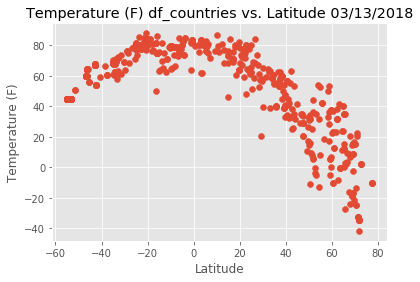

In [56]:
# Scatter Plot for Temperature (F) vs. Latitude

date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'])
plt.title(f"Temperature (F) df_countries vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature (F).png")
plt.show()

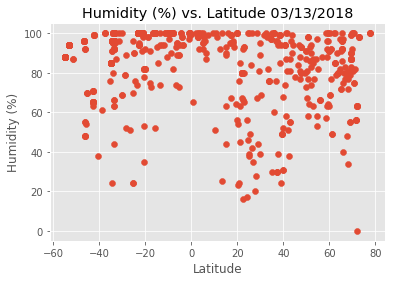

In [57]:
# # Scatter Plot for Humidity (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Humidity (%)'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity (%).png")
plt.show()

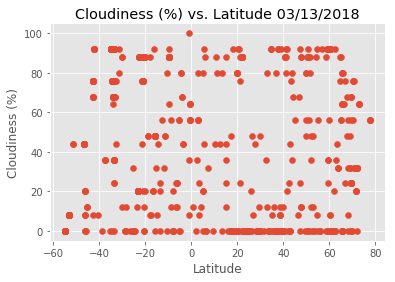

In [58]:
#Scatter Plot for Cloudiness (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Cloudiness (%)'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness (%).png")
plt.show()

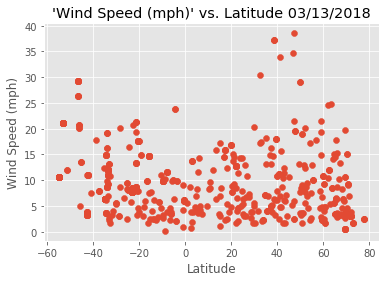

In [59]:
# # Scatter Plot for Wind Speed (mph) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Wind Speed (mph)'])
plt.title(f"'Wind Speed (mph)' vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.style.use('ggplot')
plt.savefig('Wind Speed (mph).png')
plt.show()

In [61]:
#OBSERVATIONS
 # 1 - Temperature seems bo be high picking from 40°F to 80°F then dropping down towards the equator, 
 # whis shows that the tempratures increases as it is approaching the equator. 


 # 2 - Humidity around Equator seems to be in the range on 18 (%) - 100 (%), 
    # which means that Humity is very high above the equator 

 # 3 Wind speed for most of the cities seems to fall under 5 (mph) below the equator,which seems to be normal on land and on Sea
#also Looking at the Cloud, it was well spread all over the cities but have a little clog at 0 mergin below the equator.
